# PART 1

## **Exercise one: Identifying handwritten numbers**

In [3]:
# Import libraries
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import layers

# Download MNIST Data set
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


**Pre-process data**

In [4]:
# Flatten datasets into 1 dimension
print(X_train.shape)
print(X_test.shape)
x_train = X_train.reshape(60000,784)
x_test = X_test.reshape(10000,784)
print(x_train.shape)
print(x_test.shape)

# Rescale to values between 0 and 1
x_train = x_train / 255.
x_test = x_test / 255.

# Convert labels into categorical
print(y_train.shape)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print(y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)
(60000,)
(60000, 10)


**Model Definition**

In [5]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,),activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', 
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


**Training & evaluation**

In [6]:
history = model.fit(x_train, y_train, batch_size=128, epochs = 12, verbose = 1, validation_split = 0.2)

Epoch 1/12
375/375 [==============================] - 3s 8ms/step - loss: 0.3237 - accuracy: 0.9094 - val_loss: 0.1720 - val_accuracy: 0.9519
Epoch 2/12
375/375 [==============================] - 3s 7ms/step - loss: 0.1470 - accuracy: 0.9571 - val_loss: 0.1269 - val_accuracy: 0.9627
Epoch 3/12
375/375 [==============================] - 3s 7ms/step - loss: 0.0993 - accuracy: 0.9715 - val_loss: 0.1080 - val_accuracy: 0.9686
Epoch 4/12
375/375 [==============================] - 3s 7ms/step - loss: 0.0746 - accuracy: 0.9778 - val_loss: 0.0961 - val_accuracy: 0.9712
Epoch 5/12
375/375 [==============================] - 3s 7ms/step - loss: 0.0586 - accuracy: 0.9830 - val_loss: 0.0922 - val_accuracy: 0.9732
Epoch 6/12
375/375 [==============================] - 3s 7ms/step - loss: 0.0465 - accuracy: 0.9865 - val_loss: 0.0877 - val_accuracy: 0.9737
Epoch 7/12
375/375 [==============================] - 3s 7ms/step - loss: 0.0374 - accuracy: 0.9896 - val_loss: 0.0840 - val_accuracy: 0.9747
Epoch 

## Questions

**Question 1:** *Discuss with your group, then describe to your teacher, a list of applications where 
automatic recognition of hand-written numbers would be useful. (Question 1, 3 
points)*

**Automatic handwritten number recognition would be useful in the following situations:**


**- An application used for online school where students can write mathematics on paper at home and then take a picture that recognizes the written numbers and creates an online document with all the answers.**


**- An application that can transcribe written school grades from teachers into a digital database.**

**- An application to digitalize written bank receipts into the digital financial environment at a bank. Especially for old citizens.**

**- An application to digitaly analyze voting per mail results.**

**Question 2:** *Show your teacher the text from your console, with how long it took for each epoch 
to run and the training performance history. (Question 2, 5 points)*

**Question 3** *Plot the training history and show this to your teacher (Question 3, 3 points)*

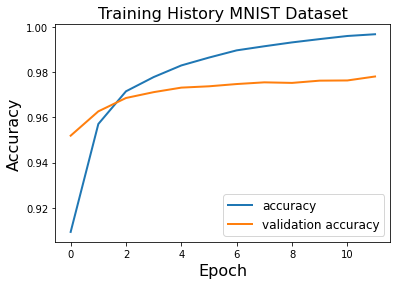

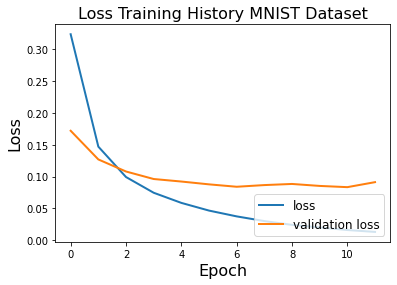

In [7]:
# Plot training history of trained model.
plt.figure()
plt.title("Training History MNIST Dataset", fontsize=16)
plt.plot(history.history['accuracy'], label='accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label = 'validation accuracy', linewidth=2)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(loc='lower right', fontsize=12)

# Plot Loss
plt.figure()
plt.title("Loss Training History MNIST Dataset", fontsize=16)
plt.plot(history.history['loss'], label='loss', linewidth=2)
plt.plot(history.history['val_loss'], label = 'validation loss', linewidth=2)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(loc='lower right', fontsize=12)

**Question 4:** *Discuss with your group, then describe to your teacher, how the accuracy on the 
training and validation sets progress differently across epochs, and what this tells us 
about the generalisation of the model. (Question 4, 5 points).*

**Both from the model history and the plotted history can be observed that the accuracy improves across epochs and especially after a steep increase after the first epoch, rises steadily from epoch 2 to 12. The validation accuracy starts much higher than the accuracy because the accuracy of the testing data is tested after the first training has been completed so naturally the validation accuracy will therefore be higher. Validation accuracy also changes more throughout all the epochs likely due to the high training rate. The validation accuracy is at the epochs 6-12 similar to the accuracy so there is no overfitting. The generalisation of the model seems therefore to be good.**

**Question 5:** *Evaluate the model performance on the test set using the following command:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
Show your teacher what values you get for the model’s accuracy and loss. (Question 
5, 2 points*

In [8]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(loss)
print(accuracy)

0.0777740478515625
0.9787999987602234


**Question 6:** *Discuss with your group, then describe to your teacher, whether this accuracy is 
sufficient for some uses of automatic hand-written digit classification. (Question 6, 5 
points)*

**This classification is not extremely accurate, with an error rate of about 1/20, so for important applications such as transcribing paper to online bank statements or voting registration, this accuracy is not sufficient. Perhaps this model can still be used if multiple checks are done. So if multiple models all predict based on the same data, the accuracy will likely greatly improve.**

**Question 7:** *Discuss with your group, then describe to your 
teacher, how linear activation of units limits the possible computations this model can 
perform. (Question 7, 5 points)*

**A linear activation impairs the possible use of the model because there can be no hidden layers. With a linear activation, the model is actually a linear regression model that is not able to learn complex tasks. Deep hidden layers can learn complex tasks because each layer can focus on a specific part of the image such as corners or orientation, colors etc.**

**Question 8:** *Now make a similar model with a rectified activation in the first hidden layer, by 
adding the extra argument:
activation = “relu”
to the model definition for this layer. Then compile, fit and evaluate the model. 
Plot the training history and show it to your teacher (Question 8, 2 points)*

**Question 9:** *Discuss with your group, then describe to your teacher, how this training history 
differs from the previous model, for the training and validation sets. Describe what 
this tells us about the generalisation of the model.
(Question 9, 5 points)*

**Currently the model has a non-linear acivation layer (Relu) and therefore the model can have deep layers that allow the model to focus on specific features of the image. Therefore the accuracy and validation accuracy is much higher than the previous model. However, the generalisation is lower because the model is overfitting after a couple of epochs (3-4); the validation accuracy does not increase after a few epochs (3-4), while the accuracy does. The overfitting is also visible in the loss function, because the validation loss does not decline after 3-4 epochs, while the loss does decline further.**

## **Deep convolutional networks**

Basically same code as above but with slight adjustments.
Written twice in case we need first part of the code again

In [9]:
# PREPROCESS Data for convolutional network
# Import libraries
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Download MNIST Data set
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

# Flatten datasets into 1 dimension
print(X_train.shape)
print(X_test.shape)
x_train = X_train.reshape(60000,28,28,1)
x_test = X_test.reshape(10000,28,28,1)
print(x_train.shape)
print(x_test.shape)

# Rescale to values between 0 and 1
x_train = x_train / 255.
x_test = x_test / 255.

# Convert labels into categorical
print(Y_train.shape)
y_train = keras.utils.to_categorical(Y_train, 10)
y_test = keras.utils.to_categorical(Y_test, 10)
print(y_train.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(60000, 10)


In [10]:
# MAKE convolutional network
model = keras.Sequential() 
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1))) 
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")) 
model.add(keras.layers.MaxPool2D(pool_size=(2, 2))) 
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(128, activation="relu")) 
model.add(keras.layers.Dense(10, activation="softmax")) 
model.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.Adadelta(learning_rate=1), metrics='accuracy')

history = model.fit(x_train, y_train, batch_size=128, 
epochs = 6, verbose = 1, validation_split = 0.2)

Epoch 1/6
375/375 [==============================] - 114s 302ms/step - loss: 0.2302 - accuracy: 0.9286 - val_loss: 0.0672 - val_accuracy: 0.9808
Epoch 2/6
375/375 [==============================] - 112s 299ms/step - loss: 0.0539 - accuracy: 0.9835 - val_loss: 0.0504 - val_accuracy: 0.9850
Epoch 3/6
375/375 [==============================] - 112s 298ms/step - loss: 0.0334 - accuracy: 0.9899 - val_loss: 0.0442 - val_accuracy: 0.9861
Epoch 4/6
375/375 [==============================] - 111s 296ms/step - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.0471 - val_accuracy: 0.9866
Epoch 5/6
375/375 [==============================] - 112s 298ms/step - loss: 0.0147 - accuracy: 0.9956 - val_loss: 0.0416 - val_accuracy: 0.9872
Epoch 6/6
375/375 [==============================] - 112s 299ms/step - loss: 0.0101 - accuracy: 0.9973 - val_loss: 0.0432 - val_accuracy: 0.9889


**QUESTION 10:** *Plot the training history and show this to your teacher. (Question 10, 2 points)*

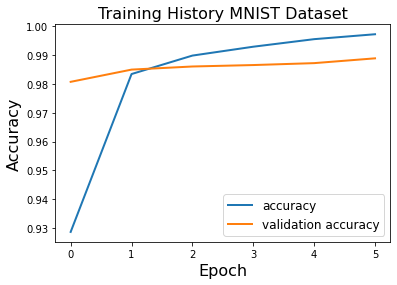

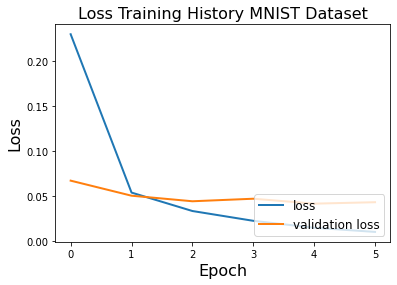

In [11]:
# Plot training history of model.
plt.figure()
plt.title("Training History MNIST Dataset", fontsize=16)
plt.plot(history.history['accuracy'], label='accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label = 'validation accuracy', linewidth=2)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(loc='lower right', fontsize=12)

# Plot Loss
plt.figure()
plt.title("Loss Training History MNIST Dataset", fontsize=16)
plt.plot(history.history['loss'], label='loss', linewidth=2)
plt.plot(history.history['val_loss'], label = 'validation loss', linewidth=2)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(loc='lower right', fontsize=12)

**Question 11:** *Discuss with your group, then describe to your teacher, how the training history differs from the previous model, for the training and validation sets. What does this tell us about the generalisation of the model?
(Question 11, 5 points)*

**Both models do not differ very much except for the validation loss. The validation loss is much lower in this model compared to the previous one. The validation accuracy starts at a higher level in this model compared to the previous model. The accuracy of the current model is 0.997 and validation accuracy is 0.988, while the accuracy of the previous model was 0.997 and the validation accuracy was 0.978. The difference between the accuracy and validation accuracy is smaller in this model than in the previous model. Therefore, this model has a better generalisation than the previous model.**

**Question 12:** *Show your teacher what values you get for the model’s accuracy and loss. (Question 12, 2 points)*

In [12]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(loss)
print(accuracy)

0.03139574080705643
0.9904999732971191


**Question 13:** *Discuss with your group, then describe to your teacher, whether this accuracy is sufficient for some uses of automatic hand-written digit classification. (Question 13, 5 points)*

**The accuracy is pretty high with almost 99% accuracy. For some uses of automatic hand-written digit classification this is sufficient. Such as transcribing written notes into digital ones, but for financial statements such as digitalizing bank receipts or translating written votes into digital numbers, this is still a 1/100 error-rate so too high for high-stake uses.**

In [13]:
# MAKE convolutional network 2
model2 = keras.Sequential() 
model2.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1))) 
model2.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")) 
model2.add(keras.layers.MaxPool2D(pool_size=(2, 2))) 
# ADDED
model2.add(keras.layers.Dropout(rate=0.25))

model2.add(keras.layers.Flatten()) 
model2.add(keras.layers.Dense(128, activation="relu")) 
# ADDED
model2.add(keras.layers.Dropout(rate=0.5))
model2.add(keras.layers.Dense(10, activation="softmax")) 

model2.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.Adadelta(learning_rate=1), metrics='accuracy')

history2 = model2.fit(x_train, y_train, batch_size=128, 
epochs = 6, verbose = 1, validation_split = 0.2)

Epoch 1/6
375/375 [==============================] - 118s 314ms/step - loss: 0.3085 - accuracy: 0.9049 - val_loss: 0.0688 - val_accuracy: 0.9797
Epoch 2/6
375/375 [==============================] - 117s 313ms/step - loss: 0.0988 - accuracy: 0.9706 - val_loss: 0.0550 - val_accuracy: 0.9850
Epoch 3/6
375/375 [==============================] - 118s 315ms/step - loss: 0.0727 - accuracy: 0.9783 - val_loss: 0.0439 - val_accuracy: 0.9877
Epoch 4/6
375/375 [==============================] - 116s 310ms/step - loss: 0.0585 - accuracy: 0.9827 - val_loss: 0.0449 - val_accuracy: 0.9878
Epoch 5/6
375/375 [==============================] - 116s 309ms/step - loss: 0.0514 - accuracy: 0.9845 - val_loss: 0.0377 - val_accuracy: 0.9897
Epoch 6/6
375/375 [==============================] - 115s 307ms/step - loss: 0.0442 - accuracy: 0.9867 - val_loss: 0.0412 - val_accuracy: 0.9890


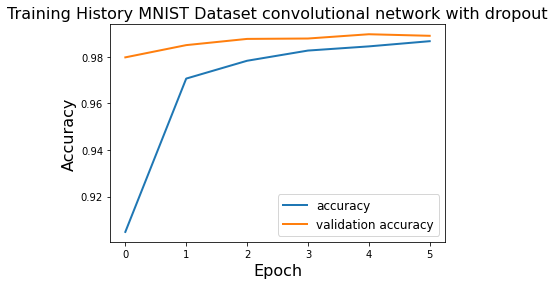

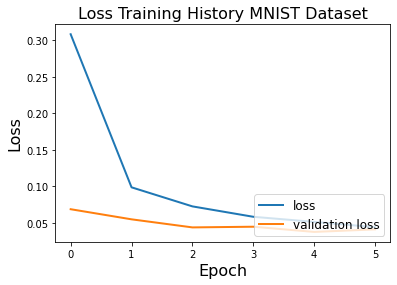

In [14]:
# Plot training history of model.
plt.figure()
plt.title("Training History MNIST Dataset convolutional network with dropout", fontsize=16)
plt.plot(history2.history['accuracy'], label='accuracy', linewidth=2)
plt.plot(history2.history['val_accuracy'], label = 'validation accuracy', linewidth=2)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(loc='lower right', fontsize=12)

# Plot Loss
plt.figure()
plt.title("Loss Training History MNIST Dataset", fontsize=16)
plt.plot(history2.history['loss'], label='loss', linewidth=2)
plt.plot(history2.history['val_loss'], label = 'validation loss', linewidth=2)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(loc='lower right', fontsize=12)

**Question 14:** *Discuss with your group, then describe to your teacher, how the training history differs from the previous (convolutional) model, for both the training and validation sets, and for the time taken to run each model epoch (Question 14, 3 points)*

**The training history of this model differs from the previous convolutional model, because the difference between accuracy and validation accuracy is even smaller: accuracy is 0.987 and 0.989 validation accuracy in this model and the previous model has 0.997 accuracy and validation accuracy 0.988. Not only is the difference smaller, the validation accuracy is higher. Therefore, this model with dropout has better generalisation. The accuracy is lower in this model because the dropout causes the model to overfit less on the training data and perform as well on the training as on the testing data. The final accuracy after evaluation is similar to the previous model.** 

**The time it takes to run each epoch takes a bit longer in this model: 5-10 second more in this model, than in the previous convolutional model.**

**Question 15:** *Discuss with your group, then describe to your teacher, what this tells us about the generalisation of the two models. (Question 15, 3 points)*

**In the second model, dropout was used which means that the model can no longer identify input based on one specific feature that it learned with the training data set, but rather has to classify using the features for a certain category. This is also what we observe. Model 2 has a higher validation accuracy than model 1. The difference between the validation accuracy (0.989) and accuracy (0.987) is smaller in this model than in the previous model (0.997 accuracy and 0.988 validation accuracy). Model 2 does not overfit because the validation accuracy is never lower than the accuracy, unlike model 1 and is therefore more generalized than model 1.** 


# PART 2 Identifying objects from images

## Dataset with images

In [15]:
# PREPROCESS image data
# Import libraries
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import layers

# Download image Data set
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Rescale to values between 0 and 1
x_train = x_train / 255.
x_test = x_test / 255.

# Convert labels into categorical
print(y_train.shape)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print(y_train.shape)

170508288/170498071 [==============================] - 3s 0us/step
(50000, 1)
(50000, 10)


**Question 16:** *Before fitting the model, show your teacher the code you used to define the model described here. (Question 16, 6 points)*

In [ ]:
# MAKE convolutional image model
model = keras.Sequential() 
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3), padding = "same")) 
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")) 
model.add(keras.layers.MaxPool2D(pool_size=(2, 2))) 
model.add(keras.layers.Dropout(rate=0.25))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2))) 
model.add(keras.layers.Dropout(rate=0.25))
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(512, activation="relu")) 
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(10, activation="softmax")) 

model.compile(loss='categorical_crossentropy',
optimizer = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6), metrics = 'accuracy')

history = model.fit(x_train, y_train, batch_size=32, 
epochs = 20, verbose = 1, validation_data=(x_test, y_test),shuffle = True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
 261/1563 [====>.........................] - ETA: 2:18 - loss: 2.2226 - accuracy: 0.1659

**Question 17:** *Plot the training history and show it to your teacher (Question 17, 2 points)*

In [ ]:
# Plot training history of model.
plt.figure()
plt.title("Training History CIFAR Dataset", fontsize=16)
plt.plot(history2.history['accuracy'], label='accuracy', linewidth=2)
plt.plot(history2.history['val_accuracy'], label = 'validation accuracy', linewidth=2)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(loc='lower right', fontsize=12)

# Plot Loss
plt.figure()
plt.title("Loss Training History CIFAR Dataset", fontsize=16)
plt.plot(history2.history['loss'], label='loss', linewidth=2)
plt.plot(history2.history['val_loss'], label = 'validation loss', linewidth=2)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(loc='lower right', fontsize=12)

**Question 18:** *Discuss with your group, then describe to your teacher, how the training history differs from the convolutional model for digit recognition and why. (Question 18, 5 points)*


**The training history of this model on the picture set has a much lower accuracy after 20 epochs and also a less steep climbing curve than the previous models trained on the MNEST data set. This can be explained because the input is very different. The input is not only 3d because it contains colours, the different viewpoints on the objects and very different backgrounds make it more complex as well. Therefore, the input is more complex in this dataset and therefore the model trains more slowly than the previous convolutional MNEST models. Also, the learning rate is much slower 0.0001 for CIFAR instead of 1 for MNEST so the models learns slower and therefore the learning curve is less steep. The 20 epochs instead of 6 is not enough to compensate for that. The difference between validation accuracy and accuracy is not very different than the last convolutional model with dropout; The validation accuracy is always higher than the accuracy. This is because the models both have dropout layers which prevent overfitting.**

**Question 19:** *Discuss with your group, then describe to your teacher, how the time taken for each training epoch differs from the convolutional model for digit recognition. Give several factors that may contribute to this difference (Question 19, 4 points)*

**The training time of each epoch is around 3 minutes in this CIFAR model, while the training time of the MNEST model was around 2 minutes at most. This difference is likely due to the more complex input; the CIFAR input is 3d (32x32x3) while the MNEST input is 2d (28x28x1). This means that the CIFAR contains 3 times more elements than the MNEST which makes the model slower. Also, this model contains more layers than the previous models: 12 instead of 8. The batch size is smaller in this model compared to the previous models which reduces the computational power and makes sure the running time is 'only' 1 minute larger.**

# PART 3: writing functions

**Question 20:** *Write a simple function that achieves the convolution operation efficiently for twodimensional and three-dimensional inputs. This should allow you to input a set of convolutional filters (‘kernels’ in Keras’s terminology) and an input layer (or image) as inputs. The input layer should have a third dimension, representing a stack of feature maps, and each filter should have a third dimension of corresponding size. The function should output a number of two-dimensional feature maps corresponding to the number of input filters, though these can be stacked into a third dimensional like the input layer. After agreeing on a common function with your group members, show this to your teacher. (Question 20, 5 points)*


## Question 20

In [ ]:
def convolution_operation (input, *filters):
  #determine shape of the output matrix
    input = np.array(input)
    dim = len(np.shape(input))

    if (dim == 2):
          xInput, yInput = np.shape(input)
          nf, xFilter,yFilter = np.shape(filters)
    else:
          zInput,xInput,yInput = np.shape(input)
          nf, zFilter,xFilter,yFilter = np.shape(filters)
    #determine output size
    xOutput = xInput - xFilter + 1
    yOutput = yInput - yFilter + 1

    outputLijst = np.zeros((nf,xOutput,yOutput))
    filter_index = 0
    for filter in filters:
        #case input is 2D
        if (dim == 2):
          #convolution operation
          for y in range(yOutput): 
            for x in  range(xOutput):
               outputLijst[filter_index][x][y] = ((input[x:(x+xFilter), y:(y+yFilter)]) * filter).sum()
        #case input is 3D
        else:
          #determine output size
          output = np.zeros((xOutput,yOutput), dtype= int)
          for y in range(yOutput): 
            for x in  range(xOutput):
              value = ((input[0:zFilter, x:(x+xFilter), y:(y+yFilter)]) * filter).sum()
              outputLijst[filter_index][x][y] = value
        filter_index += 1
    return outputLijst 


In [ ]:
#testcase 2D
A_2D = [[1,1,1,1],[2,2,2,2],[3,3,3,3],[4,4,4,4]]
test_filter = [[1,1],[0,0]]
print(convolution_operation(A_2D, test_filter))

In [ ]:
#testcase 3D
A_3D = [[[1,1,1,1],[2,2,2,2],[3,3,3,3]],[[1,1,1,1],[2,2,2,2],[3,3,3,3]]]
test_filter_3D = [[[1,1],[1,1]],[[1,1],[1,1]]]
print(convolution_operation(A_3D, test_filter_3D))

## Question 21

**Question 21:** *Write a simple function that achieves rectified linear (relu) activation over a whole
feature map, with a threshold at zero. After agreeing on a common function with your
group members, show this to your teacher. (Question 21, 2 points)*

In [ ]:
#Sunny relu without for-loop
def relu_function(input, max_cijfer = float('inf')):
  output = np.maximum(input, 0)
  output = np.minimum(output, max_cijfer)
  return output

In [ ]:
#testcase
A = [[-1, 0], [2000, 3]]
print(np.asmatrix(A))
print(relu_function(A))

## Question 22

**Question 22:** *Write a simple function that achieves max pooling. This should allow you to specify the spatial extent of the pooling, with the size of the output feature map changing accordingly. After agreeing on a common function with your group members, show this to your teacher. (Question 22, 3 points)* 


In [ ]:
# Jacob
import numpy as np
def new_pool(inpt, size):
    m,n = inpt.shape
    print(inpt.reshape(m//size,size,n//size,size))
    return inpt.reshape(m//size,size,n//size,size).max(axis=(1,3))

inpt = np.array([
      [  1,  2,  5, 4],
      [  3,  4,  7, 5],
      [  9,  10, 13, 7],
      [  16,  10, 13, 20],
      [  9,  10, 13, 40],
      [  9,  10, 13, 12],
])

print(new_pool(inpt, 2))

## Question 23

**Question 23:** *Write a simple function that achieves normalisation within each feature map, modifying the feature map so that its mean value is zero and its standard deviation is 10 one. After agreeing on a common function with your group members, show this to your teacher. (Question 23, 2 points)*


In [ ]:
# Rivka
def imitate_normalize(inpt):
  inpt = np.array(inpt)
  inpt = inpt.astype(float)
  normalized_input=np.zeros(inpt.shape[0])
  for layer in range(inpt.shape[0]):
    inpt[layer] = (inpt[layer] - inpt[layer].mean()) / inpt[layer].std()
  return inpt

#print(5 + (np.random.randn(4, 4) * 2))
inpt = np.array([[2,-4],[-4,2]])
A_3D = [[[1,1,1,1],[2,2,2,2],[3,3,3,3]],[[5,5,5,5],[2,2,2,2],[3,3,3,3]]]
imitate_normalize(A_3D)

## Question 24

**Question 24:** *Write a function that produces a fully-connected layer. This should allow you to specify the number of output nodes, and link each of these to every node a stack of feature maps. The stack of feature maps will typically be flattened into a 1- dimensional matrix first. After agreeing on a common function with your group members, show this to your teacher. (Question 24, 5 points)*



In [ ]:
# Jacob 
import numpy as np

def fully(image, weights):
  
  # Flatten image
  image = (np.asmatrix(image)).flatten()
  col = len(weights[0])

  # Create matrices of equal size
  image_h = np.tile(image, (col, 1))

  # Return product of matrices - fully connected layer
  return np.matmul(image_h, weights)[0]

image_test = [[1,2],[3,4]]

test_weigths = [[1,5,9],[2,6,10],[3,7,11],[4,8,12]]

print(fully(image_test, test_weigths))

## Question 25

**Question 25:** *Write a function that converts the activation of a 1-dimensional matrix (such as the output of a fully-connected layer) into a set of probabilities that each matrix element is the most likely classification. This should include the algorithmic expression of a softmax (normalised exponential) function. After agreeing on a common function with your group members, show this to your teacher. (Question 25, 2 points)*

In [ ]:
# Rivka
# Softmax function
def imitate_softmax(input_layer):
    exponential = np.exp(input_layer)
    exponential_sum = np.sum(exponential)
    return exponential/exponential_sum

In [ ]:
# Test case softmax
A_1D = [1,2,3,4,5,6,7,8,9,10]
imitate_softmax(A_1D)

# Extra Functions from part 3

In [ ]:
#20
#JJ's code
#this function does make the output smaller than the input
#better suited for categorization than image transformation
#also, the outputted featureMaps might not be the same size if the filters aren't
#function should be used like: convolution(x, y, z, input=exampleArray)

def convolutionFunction(*filters, input):
    input = numpy.array(input)
    inputshape = numpy.shape(input)
    featureMapList = []

    for filter in filters:
        filter = numpy.array(filter)
        filtershape = numpy.shape(filter)

        if (len(inputshape) == 2):
            featureMap = numpy.empty(inputshape[0]-(filtershape[0]-1), inputshape[1]-(filtershape[1]-1))
            for xvalue in range(inputshape[0]-(filtershape[0]-1)):
                for yvalue in range(inputshape[1]-(filtershape[1]-1)):
                    tempValue = 0
                    for xelement in range(filtershape[0]):
                        for yelement in range(filtershape[1]):
                            tempValue = tempValue + filter[xelement, yelement] * input[xvalue + xelement, yvalue + yelement]
             
                    featureMap[xvalue, yvalue] = tempValue
            featureMapList.append(featureMap)

        else:
            featureMap = numpy.empty(inputshape[0]-(filtershape[0]-1), inputshape[1]-(filtershape[1]-1))
            for xvalue in range(inputshape[0]-(filtershape[0]-1)):
                for yvalue in range(inputshape[1]-(filtershape[1]-1)):
                    
                    tempValue = 0
                    for xelement in range(filtershape[0]):
                        for yelement in range(filtershape[1]):
                            for zelement in range(filtershape[2]):
                                tempValue = tempValue + filter[xelement, yelement, zelement] * input[xvalue + xelement, yvalue + yelement, zelement]
                                 
                    featureMap[xvalue, yvalue] = tempValue
                    
            featureMapList.append(featureMap)

    return featureMapList

In [ ]:
# Jacob 21

def relu_matrix(feature_map):
  feature_map = np.array(feature_map)
  return np.maximum(0,feature_map)

In [ ]:
# Rivka 21
# Without for-loops relu function
def relu_activation(input):
  M_input = np.array(input)
  output = np.maximum(0,M_input)
  return output

In [ ]:
#21
# Jacob
def relu(feature_map):
    return [max(0, x) for x in feature_map]
    
feature_map = [x for x in range(-3, 6)]
output = relu(feature_map)


print(feature_map, output)

#JJ's code
def reluFunction(featuremap):
    featuremap = np.array(featuremap)
    mapShape = np.shape(featuremap)
    for x in range(mapShape[0]):
            for y in range(mapShape[1]):
                if (featuremap[x, y] < 0):
                    featuremap[x, y] = 0
    return featuremap

# Rivka
# Function to imitate relu activation 
def relu_imitation(input):
    output = []
    for element in input:
      output.append(max(0.0, float(element)))
    return output

In [ ]:
# 21
def relu_activation(input):
  M_input = np.asmatrix(input)
  if (M_input.ndim == 2):
    r, c = M_input.shape
    output = np.zeros([r,c], dtype= int)
    for y in range(c):
      for x in range(r):
        output[x,y] = max(0, M_input[x,y])
    return output

In [ ]:
# 22
# Rivka
# Imitate pooling layer 
def pool_imitation(input, pool_size):
  stride = pool_size[0]

  # Input size of image
  input_size = (len(input))

  # Make output size based on pool_size and input size
  output_size = ((input_size - stride)) + 1

  # Make output matrix
  output_mat = []

  # Define start position in matrix
  start_x = 0
  start_y = 0

  # How much to move each iteration
  move_x = pool_size[0]
  move_y = pool_size[1]

  # Loop through input 
  for x_position in range(output_size):
    for y_position in range(output_size):
      # Take correct part of image
      part = np.max(input[x_position:x_position+move_x,y_position:y_position+move_y])
      # Store part_max in output
      output_mat.append(part)

  return np.reshape(output_mat,[output_size,output_size])

# Test
input = np.array([[1,2,3]] * 3)

pool_size = ([2,2])
pool_imitation(input, pool_size)

#JJ's code
#sizePool is a list with two integers of which the inputMap is dividable by in height and width
def maxpoolFunction(sizePool, inputMap):
    inputMap = numpy.array(inputMap)
    inputshape = numpy.shape(inputMap)

    xpool = sizePool[0]
    ypool = sizePool[1]

    featureMap = numpy.empty(inputshape[0]/xpool, inputshape[1]/ypool)

    xvalue = 0
    yvalue = 0
    xvalueForNewMap = 0
    yvalueForNewMap = 0
    while (xvalue < inputshape[0]):
        while (yvalue < inputshape[1]):
            maxvalue = float('-inf')
            for x in range(xpool):
                for y in range(ypool):
                    if (inputMap[xvalue + x, yvalue + y] > maxvalue):
                        maxvalue = inputMap[xvalue + x, yvalue + y]
            
            featureMap[xvalueForNewMap, yvalueForNewMap] = maxvalue

            yvalueForNewMap = yvalueForNewMap + 1
            yvalue = yvalue + ypool
        xvalueForNewMap = xvalueForNewMap + 1
        xvalue = xvalue + xpool

    return featureMap

In [ ]:
#23
# Jacob
feature_map = [x for x in range(-4, 6)]
print(feature_map)

def new_norm(feature_map):
  feature_map -= np.mean(feature_map)
  feature_map /= np.std(feature_map)
  return feature_map

print(new_norm(feature_map))

feature_map_2d = [
                  [-4,-3,-2,-1, 0],
                  [1,2,3,4,5]
]

print(normalizeFunction(feature_map_2d))

#JJ's code
def normalizeFunction(featureMap):
    featureMap = np.array(featureMap)
    mapShape = np.size(featureMap)
    totalValue = 0
    elementCounter = 0

    for element in featureMap:
        totalValue = totalValue + element
        elementCounter = elementCounter + 1

    valueForMean = totalValue / elementCounter
    if (totalValue > 0):
        for x in range(mapShape[0]):
            for y in range(mapShape[1]):
                featureMap[x, y] = featureMap[x, y] - valueForMean
    else:
        for x in range(mapShape[0]):
            for y in range(mapShape[1]):
                featureMap[x, y] = featureMap[x, y] + valueForMean
    
    standardDeviation = np.std(featureMap)
    for x in range(mapShape[0]):
            for y in range(mapShape[1]):
                featureMap[x, y] = featureMap[x, y] / standardDeviation
    
    return featureMap

In [ ]:
#JJ's code 24
def connected_neuralnet(image, weights, no_output_nodes):

    # flatten input (image)
    image = (np.asmatrix(image)).flatten()

    # Loop over output nodes
    output_value = []
    for node in range(no_output_nodes):
      # Make weights as long as input
      factor = len(image)/len(weights)
      weights = weights * factor

      # Calculate output value
      output_value[node] = image * weights

    return output_value

    # listNodes = np.zeros(no_output_nodes)
    # for node in listNodes:
    #     nodeIndex = 0
    #     templist = [np.zeros(len(weights[0]))]
    #     indexlist = 0
    #     for element in image:
    #         templist[indexlist] = element * weights[element, node]
    #         indexlist = indexlist + 1
    #     listNodes[nodeIndex] = templist
    #     nodeIndex = nodeIndex + 1
    return listNodes

# Bonus

In [ ]:
def convolution_operation (input, *filters):
  #determine shape of the output matrix
    input = np.array(input)
    dim = len(np.shape(input))

    if (dim == 2):
          xInput, yInput = np.shape(input)
          nf, xFilter,yFilter = np.shape(filters)
    else:
          zInput,xInput,yInput = np.shape(input)
          nf, zFilter,xFilter,yFilter = np.shape(filters)
    #determine output size
    xOutput = xInput - xFilter + 1
    yOutput = yInput - yFilter + 1

    outputLijst = np.zeros((nf,xOutput,yOutput))
    filter_index = 0
    for filter in filters:
        #case input is 2D
        if (dim == 2):
          #convolution operation
          for y in range(yOutput): 
            for x in  range(xOutput):
               outputLijst[filter_index][x][y] = ((input[x:(x+xFilter), y:(y+yFilter)]) * filter).sum()
        #case input is 3D
        else:
          #determine output size
          output = np.zeros((xOutput,yOutput), dtype= int)
          for y in range(yOutput): 
            for x in  range(xOutput):
              value = ((input[0:zFilter, x:(x+xFilter), y:(y+yFilter)]) * filter).sum()
              outputLijst[filter_index][x][y] = value
        filter_index += 1
    return (outputLijst, filters)

# Initial image & filters
def backpropegation(input, filters, expected, l_rate):
  output, filters = convolution_operation(input, filters)

  print(output)
  print(filters)

  new_filters = list()
  # Change filters based on output
  for i in range(len(output)):
    feature_map = output[i]
    error = expected[i] - feature_map
    print(error)
    delta = (error * (feature_map * (1.0 - feature_map)))
    print(delta)
    new_filters.append(filters[i] + l_rate * delta * feature_map)

  return new_filters

In [ ]:
A_2D = [[1,1,1,1],[2,2,2,2],[3,3,3,3],[4,4,4,4]]
test_filter = [[1,1],[0,0]]
test_expected = [[[ 4,  4, 4],[ 8, 8, 8],[12, 12, 12]]]

print(backpropegation(A_2D, test_filter, test_expected, 0.1))